In [33]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [34]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn import datasets
import xgboost as xg

%matplotlib inline
import pydotplus
from IPython.display import Image
from sklearn.datasets import make_classification

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance


In [35]:
## Split the Data into Training and Testing Sets

In [40]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# Load the data into a Pandas DataFrame
df_processed_data = pd.read_csv(
    "processed_data.csv"
)

In [41]:
# Drop missing values
df_processed_data.dropna(inplace=True)
# Review the DataFrame
df_processed_data.head(10)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0
5,15574012,-0.057205,0.484225,1.032908,0.597329,0.807737,1,0,0.863650,1,0,0,1,0,1
6,15592531,1.774174,1.056346,0.687130,-1.225848,0.807737,1,1,-1.565487,0,1,0,0,0,1
7,15656148,-2.840488,-0.946079,-0.350204,0.618019,4.246377,1,0,0.334854,1,0,1,0,1,0
8,15792365,-1.547141,0.484225,-0.350204,1.050820,0.807737,0,1,-0.437329,0,1,0,0,0,1
9,15592389,0.346319,-1.136786,-1.041760,0.931463,-0.911583,1,1,-0.493230,0,1,0,0,0,1


In [77]:
# Get the target variables. 
target = df_processed_data["Exited"]


In [43]:
#Step 2: Create the labels set (y) from the "Exited"” column, and then create the features (X) 
#DataFrame from the remaining columns.

In [44]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_processed_data["Exited"]

# Separate the X variable, the features
X = df_processed_data.drop(columns="Exited")

In [45]:
# Review the y variable Series (target)
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [46]:
# Review the X variable DataFrame
X

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,15634602,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,1,0
1,15647311,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,1,0
2,15619304,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,1,0
3,15701354,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,1,0,0,1,0
4,15737888,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1.246488,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,1,0,0,0,1
9996,15569892,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,1,0,0,0,1
9997,15584532,0.604988,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,1,0,0,1,0
9998,15682355,1.256835,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,0,1,0,0,1


In [47]:
# Check the balance of our target values
#function to find the values counts of each unique value in the given Series object.
y.value_counts() 

0    7963
1    2037
Name: Exited, dtype: int64

In [48]:
##Step 4: Split the data into training and testing datasets by using train_test_split.

In [49]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split


#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [50]:
##Create a Logistic Regression Model with the Original Data

In [51]:
##Step 1: Fit a logistic regression model by using the training data (X_train and y_train).¶

In [55]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)



# Fit the model using training data
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [53]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7962666666666667
Testing Data Score: 0.7964


In [56]:
#Step 2: Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.¶

In [57]:
# Make a prediction using the testing data
# Predict outcomes for test data set
predictions = classifier.predict(X_test)

In [16]:
### Step 3: Evaluate the model’s performance by doing the following:

# Calculate the accuracy score of the model.

# Generate a confusion matrix.

#Print the classification report.

In [58]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)
print("Accuracy Score of the model")
print(accuracy_score(y_test,predictions))
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

Accuracy Score of the model
0.7964


,Prediction,Actual
2660,0,0
3535,0,0
9695,0,0
6686,0,0
7155,0,1
...,...,...
9448,0,0
3578,0,1
7175,0,0
1044,0,0


In [59]:
# Generate a confusion matrix for the model
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Displaying results
print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1991,0
Actual 1,509,0


In [60]:
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1991
           1       0.00      0.00      0.00       509

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.63      0.80      0.71      2500



C:\Users\Olive\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Olive\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Olive\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
#Predict a Logistic Regression Model with Resampled Training Data¶

In [62]:
#Step 1: Use the RandomOverSampler module from the imbalanced-learn library to resample the data. Be sure to confirm 
#that the labels have an equal number of data points.

In [64]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_oversampled, y_oversampled = ros.fit_resample(X_train, y_train)

In [65]:
# Count the distinct values of the resampled labels data
y_oversampled.value_counts()

0    5972
1    5972
Name: Exited, dtype: int64

In [66]:
#Step 2: Use the LogisticRegression classifier and the resampled data to fit the model and make predictions.¶

In [67]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
Re_LogicRe_model = LogisticRegression(solver='lbfgs', random_state=1)
#Re_LogicRe_model = LogisticRegression(solver='lbfgs',max_iter=200, random_state=1)
# Fit the model using the resampled training data
Re_LogicRe_model.fit(X_oversampled, y_oversampled)

# Make a prediction using the testing data
res_predictions = Re_LogicRe_model.predict(X_test)

In [26]:
#Step 3: Evaluate the model’s performance by doing the following:
#Calculate the accuracy score of the model.

#Generate a confusion matrix.

#Print the classification report.

In [68]:
# Print the balanced_accuracy score of the model
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
print("Accuracy Score of the model")
print(accuracy_score(y_test, res_predictions))
print("\n")
print("Balanced Accuracy Score of the model")
print(balanced_accuracy_score(y_test, res_predictions))

Accuracy Score of the model
0.7964


Balanced Accuracy Score of the model
0.5


In [69]:
# Generate a confusion matrix for the model
# Calculating the confusion matrix
cm = confusion_matrix(y_test, res_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1991,0
Actual 1,509,0


In [78]:
# Print the classification report for the model
#print(f"Accuracy Score : {accuracy_score}")
print("Classification Report")
print(classification_report(y_test, res_predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1991
           1       0.00      0.00      0.00       509

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.63      0.80      0.71      2500



C:\Users\Olive\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Olive\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Olive\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:

from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)  

In [73]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)



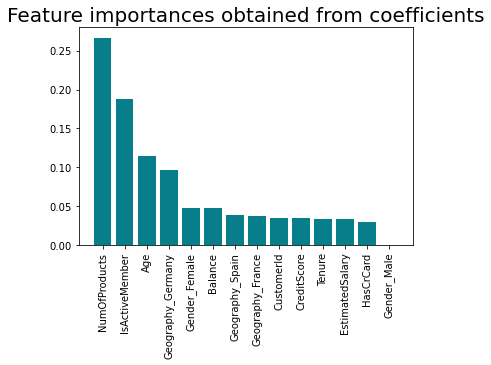

In [82]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()